<a href="https://colab.research.google.com/github/Xepe1/DAP/blob/main/%5B2023%5D_Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Examination - Lab Session
### Basic Engineering Design
##### Seoul National University of Science and Technology
##### 25. Oct. 2023.
---
| Problem | Score |
|---------|-------|
| 1       |(&emsp;&emsp;) / 50    |
| 2       |(&emsp;&emsp;) / 50    |
| Total   |(&emsp;&emsp;) / 100    |

---
* This examination contains **two problems**.

* You have **45 minutes** to complete the examination.
       
* No need to consider colors.
---

# Load Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
# Load marketing data
data = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv',
                   header=2).set_index('customerid').sample(n=500, random_state=0)

# Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Column-wise filtration
selectedAttritbute = ['age',	'salary',	'balance',	'marital',	'targeted',	'job',	'education']
data = data[selectedAttritbute]


data.head()

,age,salary,balance,marital,targeted,job,education
customerid,,,,,,,
14002,37.0,100000,1403,married,yes,management,tertiary
32047,36.0,70000,-253,single,yes,services,secondary
13319,47.0,20000,-406,married,yes,blue-collar,primary
42992,57.0,16000,501,married,yes,housemaid,primary
14238,33.0,20000,-406,married,yes,blue-collar,secondary


# Problem 1. Statics and Data Visualization  [50 Points]

## 1-1. Visualization [15 Points]
결혼 여부에 따른 나이의 분포를 KDE plot을 이용하여 나타내시오 (Plot the kernel density estimate (KDE) plot of `age` in condition of `maritial`).
- Use `kdeplot` of Seaborn

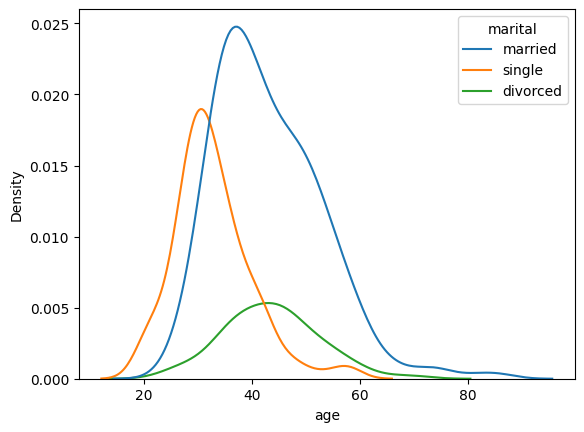

In [5]:
ax = sns.kdeplot(data, x = "age", hue = "marital")
plt.show()

## 1-2. Visualization and statistical test. [35 Points]
* [10 pts] 아래 완성된 그림을 참조하여 `marital` 상태에 따라 3개의 그룹을 나누어진 여섯 개의 `targeted`과 `balance`의 관계를 나타내고 있는 boxplot을 그리시오. (Referring to the completed figure below, draw a boxplot showing the relationship between six `targeted` and `balance`, divided into three groups according to `marital` status.)
 * **hint**, use `catplot` instead of boxplot
* [25 pts] `targeted`에 따른 `balance`의 차이가 존재하는 지 여부를 **적절한** 통계검정을 통해 p-value를 산출하시오. (Get p-value with proper statistical test whether there is a difference in `balance` according to `targeted`)
 * 옳지 않은 통계검정을 사용할 경우 감점 (If you use wrong statistical test, grade will be deducted)
 * 각 axes의 중간에 각 통계 검증의 p-value를 text 형태로 출력하시오. (Add p-value of each test in the middle of corresponding axes.)  

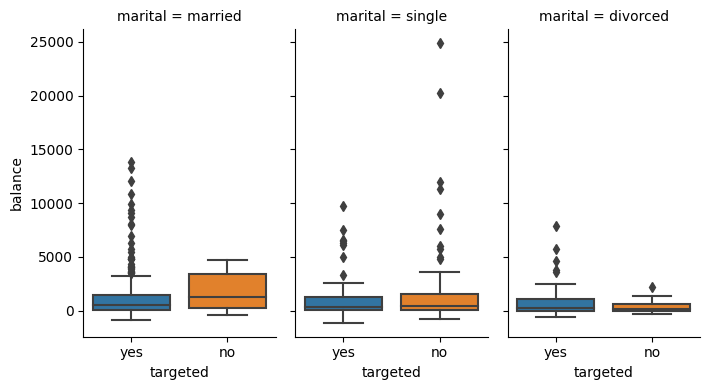

In [6]:
from scipy.stats import ttest_ind

# 1번 문항
g = sns.catplot(data, x = 'targeted', y = 'balance', col = 'marital',
                kind = 'box', height = 4, aspect = .6)

# 2번 문항
marital = ['married', 'single', 'divorced']
for ma, ax in zip(marital, g.axes[0]):
    yesSalary = ####################################
    noSalary = ####################################

    stats, p = #########(##################)

    ax.text(###########################,
          ###########################,
          ###########################,
          ###########################)

# Problem 2. Data Preprocessing [50 Points]

## 2-1 Filtering and Outlier Detection [30 Points]
* [15 pts] Remove samples with `unknown` `education`.
* [15 pts] Exclude the outlier with too much or less balance.
 * Assume that `balance` of outlier is greater than `Q3 + (2 * IQR)` and smaller than `Q1 - (2 * IQR)`.

In [ ]:
print("before filtering: %d" % len(data))

# Remove samples with `unknown` `education`.
dataFilt = data[###########################]
print("after removing samples: %d" % len(dataFilt))

# Remove outliers
attribute = 'balance'

Q1 = ####################################
Q3 = ####################################
IQR = #########
outlierStep = #########

dataFilt = dataFilt[####################################
                    ####################################]

print("after removing outlier: %d" % len(dataFilt))

before filtering: 500	
after removing samples: 478	
after removing outlier: 435	


**[범위 외 내용으로 수정 필요 없음. No need to modify, out of scope]**
* Encode `marital`, `targeted`, `job` attributes using one-hot encoding.
* Encode `education` attribute using ordinal encoding with order of (`primary`, `secondary`, `tertiary`).

In [ ]:
# Encode using one-hot encoding.
dataEncode = pd.get_dummies(dataFilt, columns=['marital', 'targeted', 'job'])

# Encode using ordinal encoding
eduMap = {'primary': 0, 'secondary':1, 'tertiary':2}
dataEncode['education'] = data.education.map(eduMap)

In [ ]:
dataEncode.head()

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
customerid,,,,,,,,,,,,,,,,,,,,
14002,37.0,100000,1403,2.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
32047,36.0,70000,-253,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
13319,47.0,20000,-406,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
42992,57.0,16000,501,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
14238,33.0,20000,-406,1.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


**[범위 외 내용으로 수정 필요 없음. No need to modify, out of scope]**
* Apply robust scaling.

In [ ]:
from sklearn.preprocessing import RobustScaler

# create a scaler object
scaler = RobustScaler()

# fit and transform the data
dataScale = pd.DataFrame(scaler.fit_transform(dataEncode), columns=dataEncode.columns)

dataScale.head()

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,-0.071429,0.80,0.760363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.142857,0.20,-0.547177,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.642857,-0.80,-0.667983,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.357143,-0.88,0.048164,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.357143,-0.80,-0.667983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2-2 kNN imputation [20 Points]
* [15 pts] 2명의 이웃 정보를 동등한 비율로 고려하는 kNN 기법을 이용하여 결측치를 imputation 시키시오. (Apply kNN imputation with two numbers of nearest neighbor using uniform weight).

In [ ]:
index = dataScale['age'].isna()
dataScale.loc[index, :]

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
371,NaN,1.2,0.012633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.impute import KNNImputer

dataImp = dataScale.copy()
# create a imputer object
imp_knn = #########(#########, #########)

# fit and transform the data
dataImp[:] = imp_knn.#########(##################)

In [ ]:
dataImp.loc[index, :]

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
371,-0.321429,1.2,0.012633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
